In [12]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras import models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model

from keras.layers import BatchNormalization

from keras.layers import MaxPooling2D

from keras.layers import concatenate

from keras.layers import Lambda, Flatten, Dense

from keras.initializers import glorot_uniform

from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.regularizers import l2

import keras.backend as K

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [9]:
!unzip Hindi.zip

Streaming output truncated to the last 5000 lines.
  inflating: Hindi/070/H-S-70-F-08.tif  
  inflating: Hindi/070/H-S-70-F-09.tif  
  inflating: Hindi/070/H-S-70-F-10.tif  
  inflating: Hindi/070/H-S-70-F-11.tif  
  inflating: Hindi/070/H-S-70-F-12.tif  
  inflating: Hindi/070/H-S-70-F-13.tif  
  inflating: Hindi/070/H-S-70-F-14.tif  
  inflating: Hindi/070/H-S-70-F-15.tif  
  inflating: Hindi/070/H-S-70-F-16.tif  
  inflating: Hindi/070/H-S-70-F-17.tif  
  inflating: Hindi/070/H-S-70-F-18.tif  
  inflating: Hindi/070/H-S-70-F-19.tif  
  inflating: Hindi/070/H-S-70-F-20.tif  
  inflating: Hindi/070/H-S-70-F-21.tif  
  inflating: Hindi/070/H-S-70-F-22.tif  
  inflating: Hindi/070/H-S-70-F-23.tif  
  inflating: Hindi/070/H-S-70-F-24.tif  
  inflating: Hindi/070/H-S-70-F-25.tif  
  inflating: Hindi/070/H-S-70-F-26.tif  
  inflating: Hindi/070/H-S-70-F-27.tif  
  inflating: Hindi/070/H-S-70-F-28.tif  
  inflating: Hindi/070/H-S-70-F-29.tif  
  inflating: Hindi/070/H-S-70-F-30.tif  
  infl

In [10]:
path_hindi = "/content/Hindi/"

In [13]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path_hindi))[1]
dir_list.sort()

In [14]:
# For each person segregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path_hindi+directory)
    images.sort()
    images = [path_hindi+directory+'/'+x for x in images]
    forg_groups.append(images[:30]) # First 30 signatures in each folder are forrged
    orig_groups.append(images[30:]) # Next 24 signatures are genuine

In [15]:
!unzip Bengali.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bengali/010/B-S-10-F-08.tif  
  inflating: Bengali/010/B-S-10-F-09.tif  
  inflating: Bengali/010/B-S-10-F-10.tif  
  inflating: Bengali/010/B-S-10-F-11.tif  
  inflating: Bengali/010/B-S-10-F-12.tif  
  inflating: Bengali/010/B-S-10-F-13.tif  
  inflating: Bengali/010/B-S-10-F-14.tif  
  inflating: Bengali/010/B-S-10-F-15.tif  
  inflating: Bengali/010/B-S-10-F-16.tif  
  inflating: Bengali/010/B-S-10-F-17.tif  
  inflating: Bengali/010/B-S-10-F-18.tif  
  inflating: Bengali/010/B-S-10-F-19.tif  
  inflating: Bengali/010/B-S-10-F-20.tif  
  inflating: Bengali/010/B-S-10-F-21.tif  
  inflating: Bengali/010/B-S-10-F-22.tif  
  inflating: Bengali/010/B-S-10-F-23.tif  
  inflating: Bengali/010/B-S-10-F-24.tif  
  inflating: Bengali/010/B-S-10-F-25.tif  
  inflating: Bengali/010/B-S-10-F-26.tif  
  inflating: Bengali/010/B-S-10-F-27.tif  
  inflating: Bengali/010/B-S-10-F-28.tif  
  inflating: Bengali/010/B-S-10-F-29.tif  
  i

In [16]:
path_bengali = "/content/Bengali/"

In [17]:
dir_list = next(os.walk(path_bengali))[1]
dir_list.sort()

In [18]:
for directory in dir_list:
    images = os.listdir(path_bengali+directory)
    images.sort()
    images = [path_bengali+directory+'/'+x for x in images]
    forg_groups.append(images[:30]) # First 30 signatures in each folder are forrged
    orig_groups.append(images[30:]) # Next 24 signatures are genuine

In [19]:
# Quick check to confirm we have data of all the 160 individuals
len(orig_groups), len(forg_groups)

(260, 260)

In [20]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

In [21]:
# Quick check to confirm that there are 24 Genuine signatures for each individual
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [22]:
# Quick check to confirm that there are 30 Forged signatures for each individual
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,

In [23]:
orig_train, orig_test, forg_train, forg_test = train_test_split(orig_groups, forg_groups, test_size=0.2, random_state=1)
orig_train, orig_val, forg_train, forg_val = train_test_split(orig_train, forg_train, test_size=0.25, random_state=1)

print(len(orig_train),len(orig_val),len(orig_test))

156 52 52


**TRAIN VALIDATION TEST SPLIT**

In [24]:
# Delete unnecessary variables
del orig_groups, forg_groups

In [25]:
# All the images will be converted to the same size before processing
img_h, img_w = 155, 220

In [26]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))
    k = np.random.randint(len(orig_train))
    orig_img_names = random.sample(orig_train[k], 2)
    forg_img_name = random.sample(forg_train[k], 1)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = plt.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.axis('off')

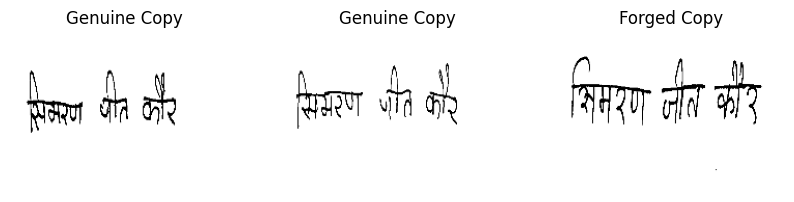

In [27]:
visualize_sample_signature()

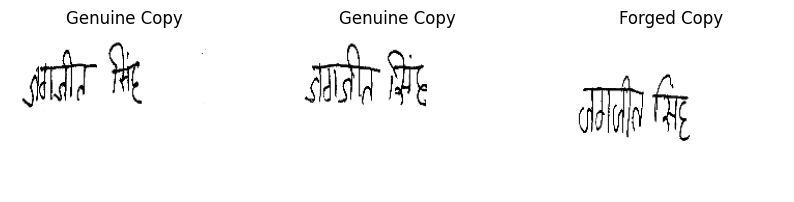

In [28]:
visualize_sample_signature()

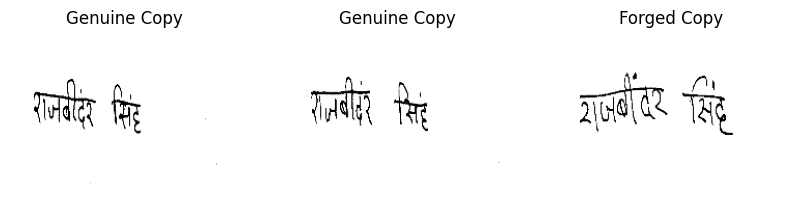

In [29]:
visualize_sample_signature()

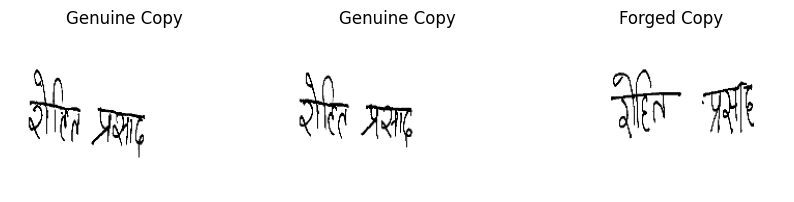

In [30]:
visualize_sample_signature()

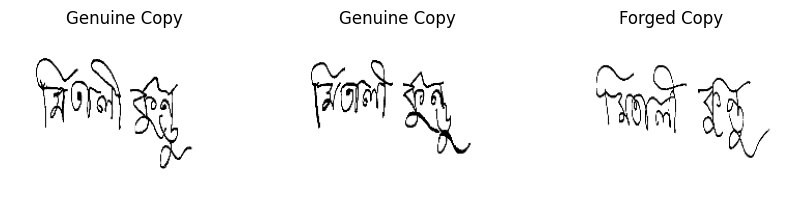

In [31]:
visualize_sample_signature()